In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv("data-export (1).csv")

In [3]:
df.head()


,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [4]:
df.columns = df.iloc[0]
df.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [6]:
df = df.drop(index = 0).reset_index(drop = True)
df.columns = ["channel group", "DateHour", "Users", "Sessions", "Engaged sessions",	"Average engagement time per session", "Engaged sessions per user",	"Events per session",	"Engagement rate",	"Event count"]

In [7]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [5]:
print(df.isnull().sum())

0
Session primary channel group (Default channel group)    0
Date + hour (YYYYMMDDHH)                                 0
Users                                                    0
Sessions                                                 0
Engaged sessions                                         0
Average engagement time per session                      0
Engaged sessions per user                                0
Events per session                                       0
Engagement rate                                          0
Event count                                              0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [9]:
df["DateHour"] = pd.to_datetime(df["DateHour"], format="%Y%m%d%H", errors='coerce')
numeric_cols = df.columns.drop(["channel group", "DateHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df["Hour"] = df["DateHour"].dt.hour
df.head()

,channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [11]:
df.describe()

,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


# sessions and user over time

In [12]:
sns.set(style="whitegrid")

<function matplotlib.pyplot.show(close=None, block=None)>

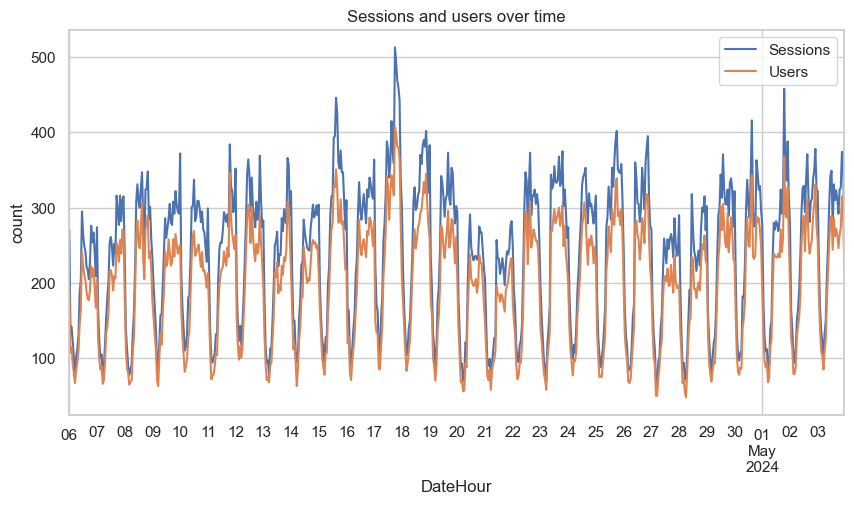

In [13]:
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and users over time")
plt.xlabel("DateHour")
plt.ylabel("count")
plt.show

## Key Insights
* Clear daily cyclical pattern (predictable peaks and valleys).
* Sessions consistently ~20–30% higher than users → repeat visits exist.
* No strong upward or downward growth trend.
* One noticeable spike around May 17–18.
## What It Means
* Traffic is stable but not growing.
* Performance depends on recurring patterns, not momentum.
* Repeat users are present but not aggressively increasing.
## Actions
* Identify exact peak hours and schedule campaigns during those periods.
* Investigate the April 17–18 spike — campaign? content? external referral?
* Introduce growth experiments (SEO push, email campaign, referral push) to break the flat trend.

# Total users by channel

In [14]:
total_users_by_channel = (
    df.groupby("channel group", as_index=False)["Users"]
    .sum()
)

total_users_by_channel

,channel group,Users
0,Direct,30042
1,Email,2
2,Organic Search,28387
3,Organic Social,47572
4,Organic Video,123
5,Referral,26774
6,Unassigned,540


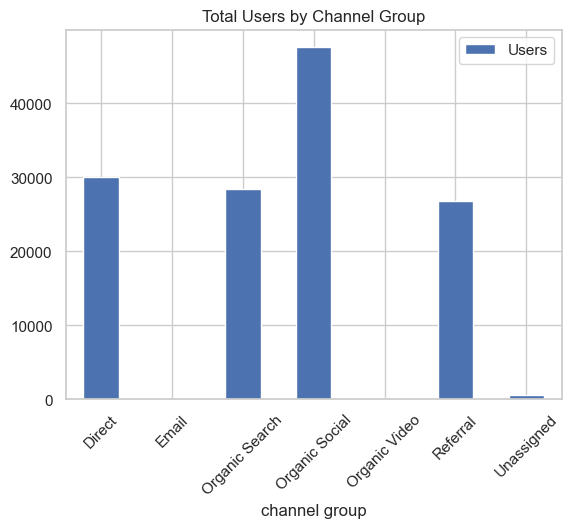

In [15]:
total_users_by_channel.plot(
    x="channel group",
    y="Users",
    kind="bar",
    title="Total Users by Channel Group"
)
plt.xticks(rotation=45)
plt.show()

# What the chart shows
* Organic Social appears to have the highest total users.
* Direct and Organic Search follow behind.
* Referral and Organic Video are much smaller.
* Email and Unassigned are almost negligible.
# Key Insight
* Traffic acquisition is concentrated mainly in 3 channels: Organic Social, Direct, and Organic Search.
* Email is not a meaningful contributor in this dataset.
* Heavy reliance on few channels increases platform dependency risk.
# Action
* Strengthen the top 3 channels strategically.
* Test diversification through Referral partnerships.
* Evaluate whether Organic Video has scalable potential.


# Average engagement time by channel

In [16]:
avg_engagement_by_channel = (
    df.groupby("channel group", as_index=False)["Average engagement time per session"]
      .mean()
)
avg_engagement_by_channel

,channel group,Average engagement time per session
0,Direct,45.533104
1,Email,72.666667
2,Organic Search,47.005018
3,Organic Social,53.493681
4,Organic Video,180.360000
5,Referral,92.660842
6,Unassigned,78.957923


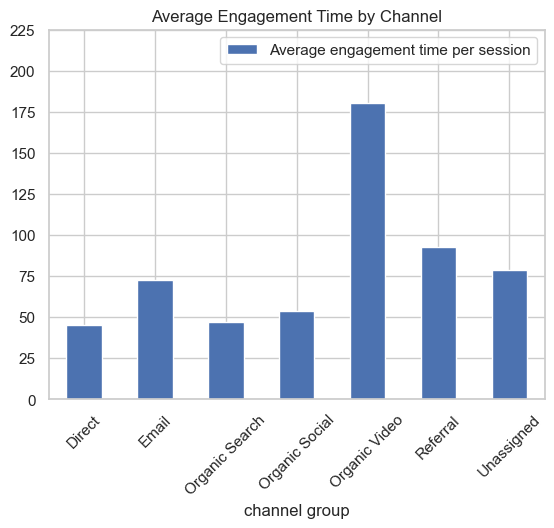

In [17]:
ax = avg_engagement_by_channel.plot(
    x="channel group",
    y="Average engagement time per session",
    kind="bar",
    title="Average Engagement Time by Channel"
)
ax.set_ylim(0, 225)
ax.legend(["Average engagement time per session"], loc='upper right')
plt.xticks(rotation=45)
plt.show()

# What the chart shows
* Organic Video has the highest engagement time.
* Referral is second highest.
* Direct has the lowest engagement time.
# Correct Key Insight
* Video traffic, though small, is high-quality.
* Referral traffic shows strong user intent.
* Social traffic lacks depth of engagement.
# Action
* Expand video strategy carefully (quality > volume).
* Build more referral partnerships.
* Improve social landing relevance and content depth.

# Engagement Rate Distributed by channel

In [18]:
 engagement_rate_distributed_by_channel = (
    df.groupby("channel group", as_index=False)["Engagement rate"]
    .sum()
)
engagement_rate_distributed_by_channel


,channel group,Engagement rate
0,Direct,306.246140
1,Email,1.000000
2,Organic Search,389.025146
3,Organic Social,363.672891
4,Organic Video,95.000000
5,Referral,444.112719
6,Unassigned,2.750000


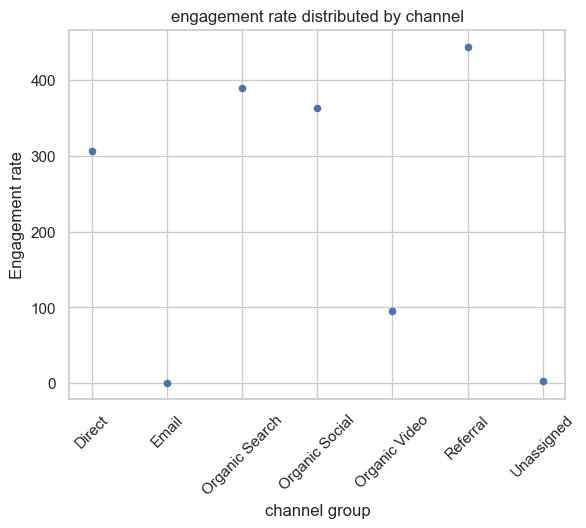

In [29]:
engagement_rate_distributed_by_channel.plot(
    x="channel group",
    y="Engagement rate",
    kind="scatter",
    title="engagement rate distributed by channel"
)
plt.xticks(rotation=45)
plt.show()

# key insights
* referral has the highest engagement rate
* Organic Search and Organic Social follow behind
* email and unassingned has very low engagement rate almost negligible

# Engaged sessions vs non engaged sessions

In [20]:
session_df = df.groupby("channel group")[["Sessions", "Engaged sessions"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged sessions"]
session_df

,channel group,Sessions,Engaged sessions,Non-Engaged
0,Direct,37203,17243,19960
1,Email,3,1,2
2,Organic Search,33372,19425,13947
3,Organic Social,60627,32697,27930
4,Organic Video,141,109,32
5,Referral,30990,20653,10337
6,Unassigned,559,4,555


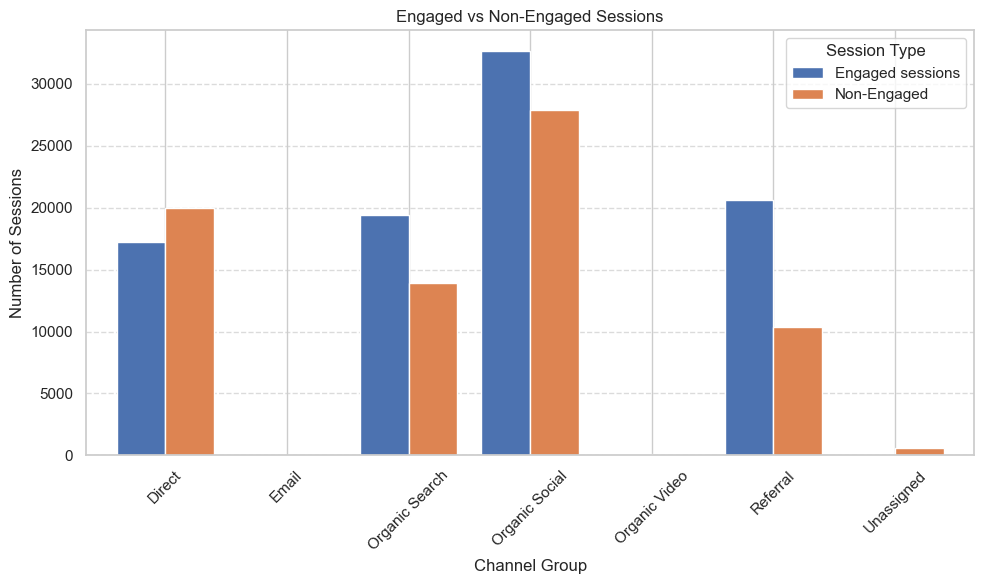

In [28]:
session_df = df.groupby("channel group")[["Sessions", "Engaged sessions"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged sessions"]


plot_data = session_df[["Engaged sessions", "Non-Engaged"]]

ax = session_df.plot(x="channel group", y=["Engaged sessions", "Non-Engaged"], kind="bar", figsize=(10, 6), width=0.8)


plt.title("Engaged vs Non-Engaged Sessions")
plt.xlabel("Channel Group")
plt.ylabel("Number of Sessions")
plt.xticks(rotation=45)
plt.legend(title="Session Type")
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()

plt.show()

# Key Insights
- Organic Video has the highest engagement rate (77%), but the lowest total sessions.
- Organic Social drives the most total sessions (60,627) and has a relatively high engagement rate (54%).
- Direct traffic has a relatively low engagement rate (46%) and high non-engagement (54%).
- Email and Unassigned channels have very low engagement rates, indicating potential issues with targeting or messaging.


# Traffic by hour and channel

In [22]:
channel_hourly = (
    df.groupby(["channel group", "Hour"], as_index=False)["Sessions"]
      .sum()
)
channel_hourly

,channel group,Hour,Sessions
0,Direct,0,1684
1,Direct,1,1196
2,Direct,2,887
3,Direct,3,771
4,Direct,4,666
...,...,...,...
142,Unassigned,19,38
143,Unassigned,20,32
144,Unassigned,21,26
145,Unassigned,22,31


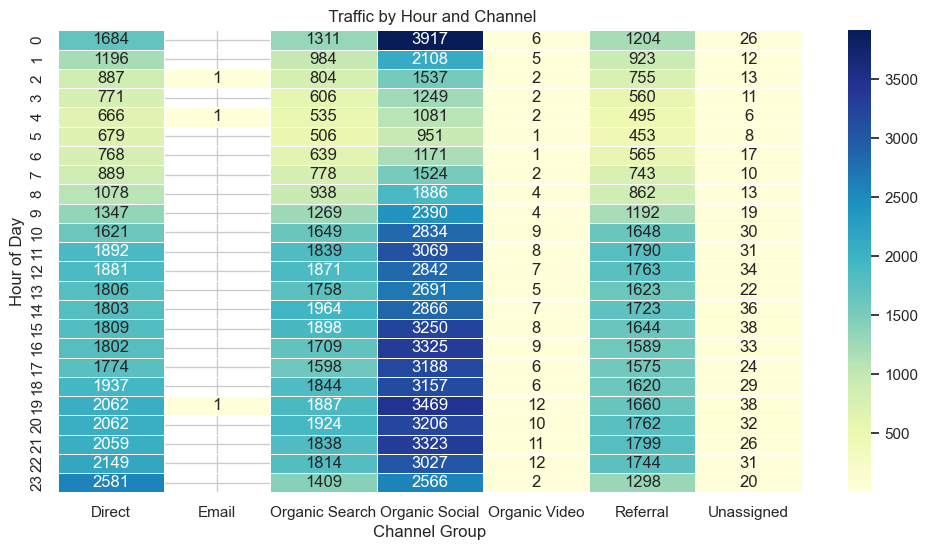

In [23]:
channel_hourly = df.groupby(["Hour", "channel group"])["Sessions"].sum().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(channel_hourly, cmap="YlGnBu", linewidths=.5, annot=True, fmt='.0f')
plt.title(" Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()


# What the chart shows
* Organic Search dominates hourly traffic intensity.
* Direct also shows strong hourly presence.
* Social traffic fluctuates across hours.
* Clear time-based traffic concentration exists.
# Correct Key Insight
* User activity is time-dependent.
* Organic Search drives the majority of hourly volume.
* Channel performance varies by hour.
# Action
* Schedule campaigns during peak traffic hours.
* Align content publishing with high-activity time windows.
* Reduce effort during low-traffic hours.

# Engagement rate vs Sessions over time

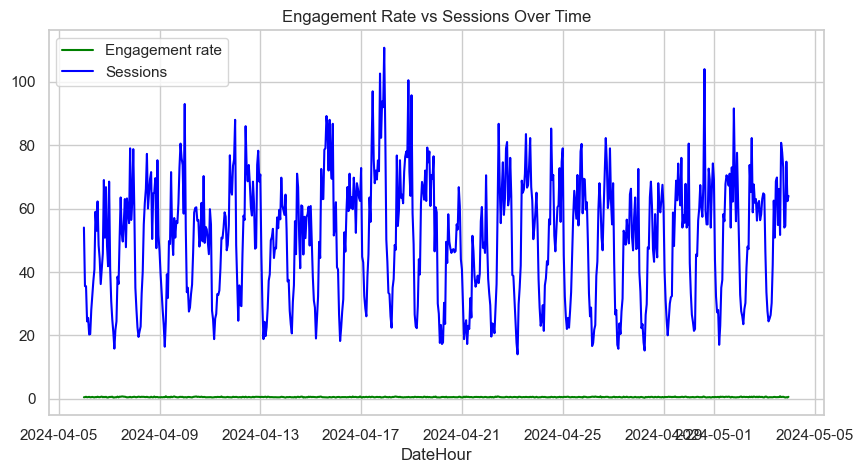

In [24]:
df_plot = df.groupby("DateHour")[["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_plot["DateHour"], df_plot["Engagement rate"], label="Engagement rate", color="green")
plt.plot(df_plot["DateHour"], df_plot["Sessions"], label="Sessions", color="blue")
plt.title("Engagement Rate vs Sessions Over Time")
plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.show()

# Key insights:
* Sessions (blue line) fluctuate heavily, showing daily peaks and troughs, with occasional spikes (e.g., around April       18). This indicates variable user activity or traffic patterns.
* Engagement Rate (green line) remains consistently low and flat near 0%, suggesting users aren’t interacting               meaningfully with the content or app despite session activity.
* There's no visible correlation between sessions and engagement rate; high session counts don’t translate to higher
  engagement.
* The data implies a need to improve content or user experience to boost engagement, as session volume alone isn’t enough   for meaningful interaction.
* Investigate spikes in sessions to understand their cause (e.g., marketing campaigns) and whether they impact engagement.
